<a href="https://colab.research.google.com/github/Ravindi24/DeepLearning_try/blob/main/CNN_LSTM_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the open price stocks using CNN-LSTM

**Import packages**

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
!pip install yfinance
import yfinance as yf

In [4]:
stock_symbol = 'GAIL.NS'   #stocks involve in particular company

In [5]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-13,113.849998,114.266663,110.099998,110.683334,87.314133,5021220
2019-05-14,110.666664,118.433334,110.250000,115.050003,90.758850,13691946
2019-05-15,114.333336,116.466667,110.283333,110.583336,87.235260,12478497
2019-05-16,111.283333,111.466667,108.900002,109.733330,86.564720,8465934
2019-05-17,110.333336,111.366669,110.066666,111.016663,87.577095,6255054


In [8]:
len(data)

1237

In [9]:
opn = data[['Open']]  # open price stock prediction

<Axes: xlabel='Date'>

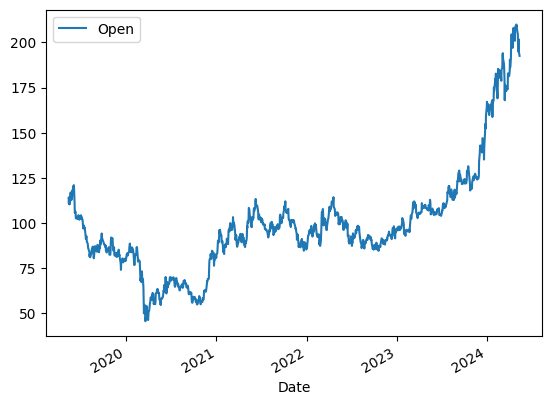

In [10]:
opn.plot()  # by default this dataset is in pandas dataframe, we can directly plot it

In [13]:

ds = opn.values   # convert the data into numpy array
ds

array([[113.84999847],
       [110.66666412],
       [114.33333588],
       ...,
       [201.8500061 ],
       [195.        ],
       [192.55000305]])

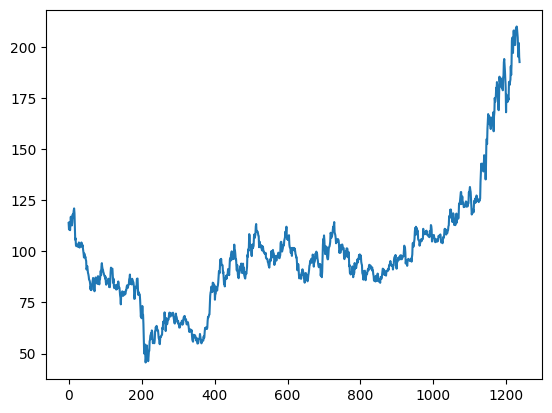

In [14]:
plt.plot(ds)

In [16]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [17]:
len(ds_scaled), len(ds)

(1237, 1237)

**Splitting Data**

In [18]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

print(train_size,test_size)

865 372


In [19]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [20]:
#creating dataset in time series for LSTM model -  this code can use for any dataset
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [21]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [22]:
X_train.shape,y_train.shape

((764, 100), (764,))

In [23]:
X_test.shape, y_test.shape

((271, 100), (271,))

In [24]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Creating LSTM model**

In [26]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear')) # predict the output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam') # this is the common loss and optimizer (can use para-tuning to define them)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 13s 391ms/step - loss: 0.0159 - val_loss: 0.0672
Epoch 2/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0036 - val_loss: 0.0178
Epoch 3/100
12/12 [==============================] - 3s 300ms/step - loss: 0.0023 - val_loss: 0.0184
Epoch 4/100
12/12 [==============================] - 3s 292ms/step - loss: 0.0015 - val_loss: 0.0120
Epoch 5/100
12/12 [==============================] - 4s 322ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 6/100
12/12 [==============================] - 4s 305ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 7/100
12/12 [==============================] - 4s 331ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 8/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0010 - val_l

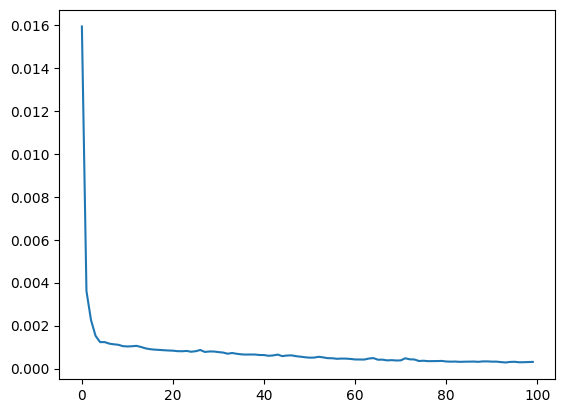

In [28]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

**Prediction**

In [29]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 33ms/step


In [30]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

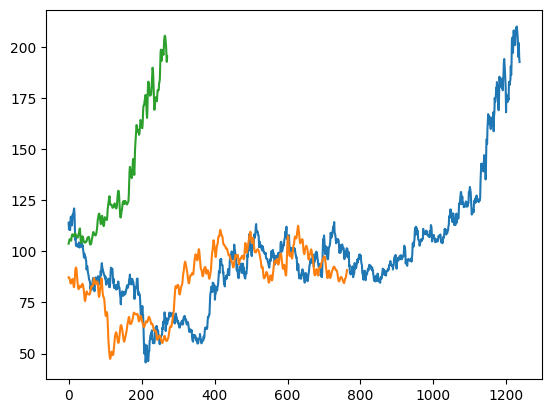

In [31]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)        #green=predicted test data,blue-actual,org-predicted train

In [32]:
type(train_predict)

numpy.ndarray

In [33]:
test = np.vstack((train_predict,test_predict))

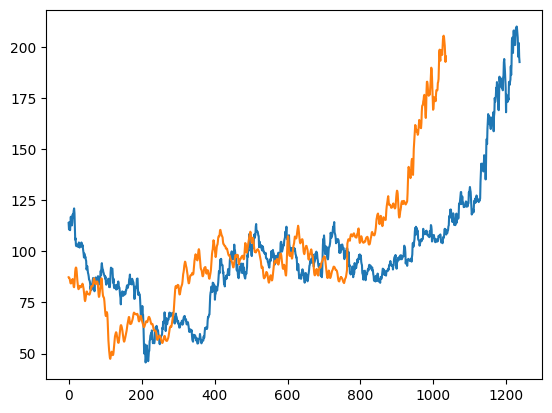

In [34]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [45]:
len(ds_test)

372

In [46]:
#Getting the last 100 days records
fut_inp = ds_test[272:]        # as ds_test contain 372

In [47]:
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
print(fut_inp.shape)

(1, 100)


In [37]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [48]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891], [0.8972568511962891]]


In [49]:
len(ds_scaled)

1237

In [50]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

In [56]:
plot_pred.shape

(30,)

In [57]:
normalizer.inverse_transform(lst_output).shape

(30, 1)

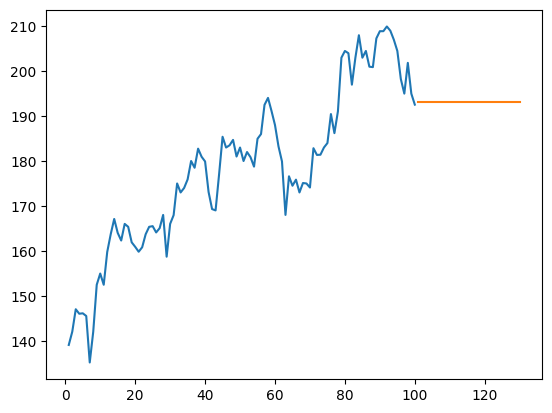

In [55]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1137:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [58]:
ds_new = ds_scaled.tolist()
len(ds_new)

1237

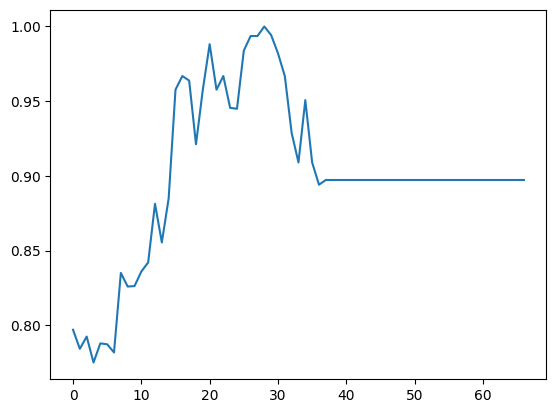

In [59]:
#Entends helps us to fill the missing value with approx value - make smoothing
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [60]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

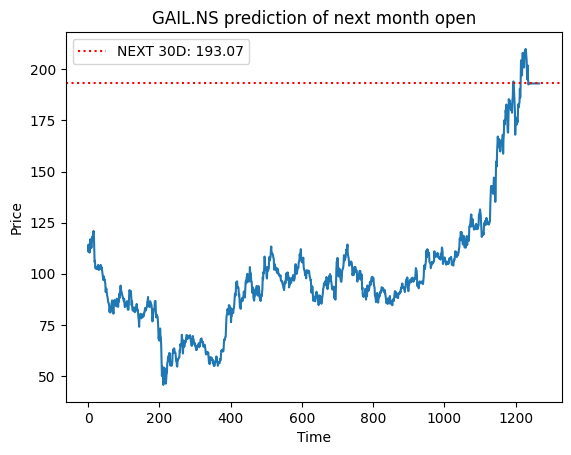

In [61]:

#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()